In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from acquire import get_titanic_data
from prepare import prep_titanic

In [2]:
df = get_titanic_data()

In [3]:
df.fillna(np.nan, inplace=True)

In [4]:
train, test = train_test_split(df, train_size=.7, random_state=123)

In [5]:
imputer_mode = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')
train['embarked'] = imputer_mode.fit_transform(train[['embarked']])
train['embark_town'] = imputer_mode.fit_transform(train[['embark_town']])
# Do the same for test data in case there are any nulls
test['embarked'] = imputer_mode.fit_transform(test[['embarked']])
test['embark_town'] = imputer_mode.fit_transform(test[['embark_town']])

In [6]:
train.drop(columns=['deck'], inplace = True)
test.drop(columns=['deck'], inplace = True)

In [7]:
# Assign a variable to the encoder
train_int_encoder = LabelEncoder()
# Fit the encoder to our embarked column from our train data
train_int_encoder.fit(train[['embarked']])
# Transform the data and save over the old
train.embarked = train_int_encoder.transform(train.embarked)

In [8]:
# Handle nulls in age
imp_median = SimpleImputer(missing_values=np.nan, strategy = 'median')
train['age'] = imp_median.fit_transform(train[['age']])
# Assign MinMaxScaler to a variable
scaler = MinMaxScaler()

In [9]:
# Scale age
train['age'] =scaler.fit_transform(train[['age']])

In [10]:
# Scale fare
train['fare'] = scaler.fit_transform(train[['fare']])

In [11]:
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone
416,416,1,2,female,34.0,1,1,0.063436,2,Second,Southampton,0
801,801,1,2,female,31.0,1,1,0.051237,2,Second,Southampton,0
512,512,1,1,male,36.0,0,0,0.051310,2,First,Southampton,1
455,455,1,3,male,29.0,0,0,0.015412,0,Third,Cherbourg,1
757,757,0,2,male,18.0,0,0,0.022447,2,Second,Southampton,1


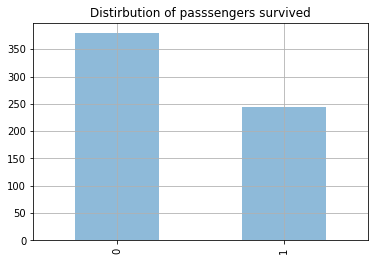

In [12]:
train.survived.value_counts().sort_index().plot(kind = "bar",alpha = .5)
plt.title("Distirbution of passsengers survived")
plt.grid(b = True , which = "major")

In [23]:
pd.Series(train.select_dtypes(object).columns)

0            sex
1          class
2    embark_town
dtype: object

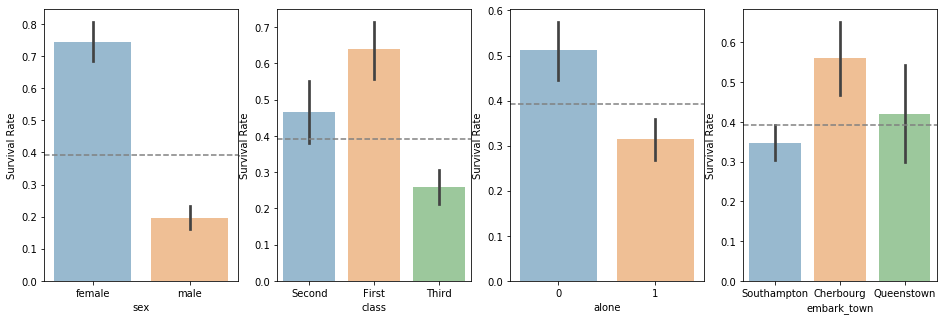

In [20]:
features = ['sex', 'class', 'alone', 'embark_town']

_, ax = plt.subplots(nrows=1, ncols=4, figsize=(16,5))

survival_rate = train.survived.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'survived', data=train, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Survival Rate')
    ax[i].axhline(survival_rate, ls='--', color='grey')

In [24]:
pd.Series(train.select_dtypes(int,float).columns)

0    passenger_id
1        survived
2          pclass
3           sibsp
4           parch
5        embarked
6           alone
dtype: object

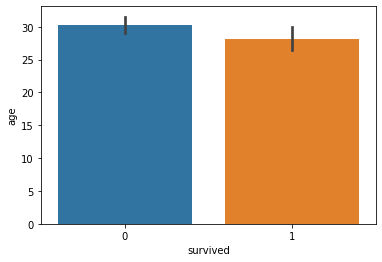

In [22]:
# Mean ages of those how survived and those who did not
sns.barplot(train.survived, y=train.age)

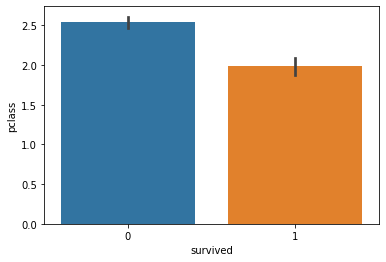

In [26]:
sns.barplot(train.survived, y=train.pclass)

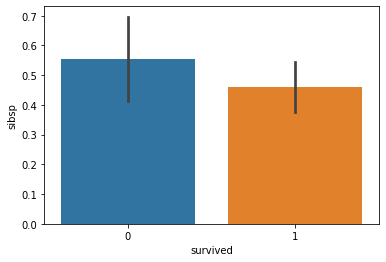

In [27]:
sns.barplot(train.survived, y=train.sibsp)

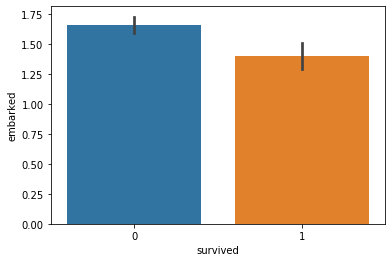

In [28]:
sns.barplot(train.survived, y=train.embarked)

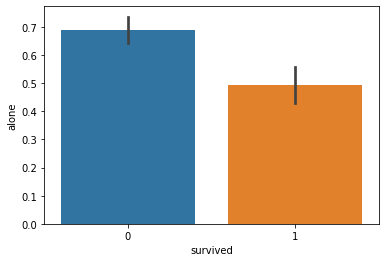

In [29]:
sns.barplot(train.survived, y=train.alone)